<a href="https://colab.research.google.com/github/mag381/AI/blob/main/09_%E7%8A%AC%E7%8C%AB%E5%88%A4%E5%AE%9A_OK_a01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import sys, os, glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFile

In [4]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

#from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [5]:
# Bing で画像収集するプログラムをインストール
!pip install icrawler
from icrawler.builtin import BingImageCrawler

In [17]:
#  笑っている顔 と 悲しい顔 の画像をネットから収集する

# 笑顔の画像を保存するフォルダーを指定する
crawler = BingImageCrawler(storage={"root_dir": "happy"})
# 笑顔の画像を40枚取得
crawler.crawl(keyword="笑顔 高校生　一人", max_num=200)

# 悲しい顔の画像を保存するフォルダーを指定する
#crawler = BingImageCrawler(storage={"root_dir": "sad"})
# 悲しい顔の画像を40枚取得
#crawler.crawl(keyword="悲しい顔", max_num=40)

# ダウンロード不可のサイトの場合 ERROR が表示される
# 結果的に取得枚数が40枚未満になる場合がある

ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.jpg, error: HTTPSConnectionPool(host='www.photolibrary.jp', port=443): Max retries exceeded with url: /mhd5/img845/450-20210702214832.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7aaa4b7e8650>, 'Connection to www.photolibrary.jp timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.jpg, error: HTTPSConnectionPool(host='www.photolibrary.jp', port=443): Max retries exceeded with url: /mhd5/img845/450-20210702214832.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7aaa4b73ac10>, 'Connection to www.photolibrary.jp timed out. (connect timeout=5)')), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.j

In [8]:
def hyouji(files,num_data):
  plt.figure(figsize=(10,8))
  for i, file in enumerate(files):   # files から file を順番に取り出す
    image = Image.open(file)         # 画像ファイルを開く
    image = image.convert("RGB")     # カラーの種類をRGB形式に変換

    if i<num_data:
       ax = plt.subplot(num_data // 3, 4, i+1)
       # 画像を行、列に配置する　3なら1行に3画像を配置する
       plt.tight_layout()            # 画像同士が重ならないようにする
       file_name=os.path.split(file)[1]
       # ファイル名を図のタイトルとして設定する
       ax.set_title(file_name)
    plt.axis('off')
    plt.imshow(image)                   # 画像を表示

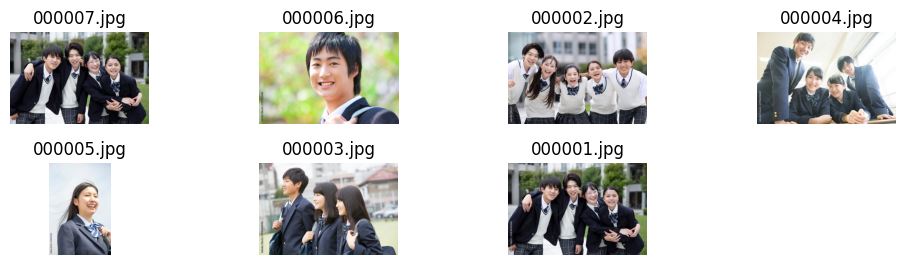

In [16]:
num_data =20

# 条件を満たすファイル名の一覧を glob で取得し、
# 変数 files に格納する
files = glob.glob("./happy/*.jpg")
# files に格納された画像データをnum_data の数だけ表示
#
hyouji(files,num_data)

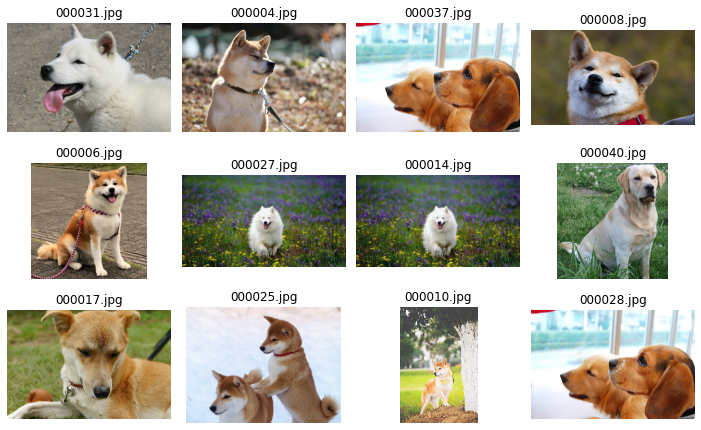

In [ ]:
num_data =12
files = glob.glob("./dog/*.jpg")
hyouji(files,num_data)

In [ ]:
#  画像データ分割の始まり

# IOError: image file is truncated (0 bytes not processed)回避のため
ImageFile.LOAD_TRUNCATED_IMAGES = True

classes = ["dog", "cat"]
num_classes = len(classes)
num_classes

2

In [ ]:
image_size = 64
num_testdata = 20

X_train = []
X_test  = []
y_train = []
y_test  = []

# classes の中身を順番に取り出す
# index=0, classlabel="dog"
# index=1, classlabel="cat"

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")

    # フォルダ内のファイルを順番に取り出す
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        # 画像を配列として扱えるようにする
        data = np.asarray(image)
        # ファイル数がnum_testdata より小さければ
        # X_test や y_test にデータを追加する
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:
            # データ拡張拡張をする（回転、左右反転）
            # angleに代入される値
            # -20
            # -15
            # -10
            #  -5
            # 0
            # 5
            # 10
            # 15
            # -20からスタートして、5ずつ増やし、
            # 20になったら終わり
            # 20の時、for文の内部は実行せず終わるので、処理は15で終わり
            for angle in range(-20, 20, 5):
                # 画像を angle だけ回転する
                img_r = image.rotate(angle)
                # 画像を配列として扱えるようにする
                data = np.asarray(img_r)
                X_train.append(data)
                y_train.append(index)
                # さらに左右反転画像も作る
                img_trains = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                # 画像を配列として扱えるようにする
                data = np.asarray(img_trains)
                X_train.append(data)
                y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

# 4つの変数を1つの xy という変数に格納する
xy = (X_train, X_test, y_train, y_test)
# 変数 xy の内容をファイルとして保存する
np.save("./dog_cat.npy", xy)

#  画像データ分割の終わり

/usr/local/lib/python3.9/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
#  モデル学習始まり

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    # 保存ファイルをロードして、元の変数に戻す
    # allow_pickle で配列情報を保存するかどうかを指定
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # 入力データの各画素値を0-1の範囲で正規化(学習コストを下げるため)
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    # to_categorical()にてラベルをone hot vector化
    # ここではクラス数は2なので、one hot vector は2要素
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()

    # Xは(1200, 64, 64, 3)
    # X.shape[1:]とすることで、(64, 64, 3)となり、入力値として使える
    # 0番目の 1200 の部分がなくなるということ
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    # HDF5ファイルにKerasのモデルを保存
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

#  モデル学習終わり

Epoch 1/40
22/22 [==============================] - 12s 25ms/step - loss: 0.8136 - accuracy: 0.5148
Epoch 2/40
22/22 [==============================] - 0s 12ms/step - loss: 0.6681 - accuracy: 0.5707
Epoch 3/40
22/22 [==============================] - 0s 12ms/step - loss: 0.5103 - accuracy: 0.7730
Epoch 4/40
22/22 [==============================] - 0s 13ms/step - loss: 0.3388 - accuracy: 0.8684
Epoch 5/40
22/22 [==============================] - 0s 12ms/step - loss: 0.1533 - accuracy: 0.9523
Epoch 6/40
22/22 [==============================] - 0s 12ms/step - loss: 0.0496 - accuracy: 0.9868
Epoch 7/40
22/22 [==============================] - 0s 13ms/step - loss: 0.0307 - accuracy: 0.9918
Epoch 8/40
22/22 [==============================] - 0s 12ms/step - loss: 0.0242 - accuracy: 0.9934
Epoch 9/40
22/22 [==============================] - 0s 12ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 10/40
22/22 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 11

Saving dog2.jpg to dog2.jpg
1/1 [==============================] - 0s 208ms/step
[[1.0000000e+00 1.5077717e-08]]
>>> 犬


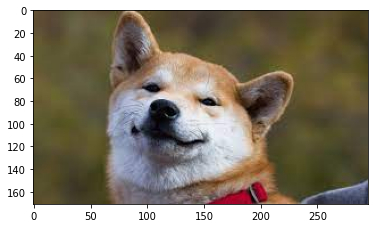

In [ ]:
# 学習が終わったので判定できる

imsize = (64, 64)

# 選択したファイルを読み込みする
# dog2.jpg を選択すること
from google.colab import files
uploaded_file = files.upload()
# 選択したファイルの名前を取得する
uploaded_file_name = next(iter(uploaded_file))

# その画像ファイルをOpenCVの機能で読み込む
img = cv2.imread(uploaded_file_name)
# OpenCVで画像用読み込みすると、色情報が BGRになるので
# cvtColor で RGB にする
show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(show_img)
testpic     = uploaded_file_name
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    # 学習時に、(64, 64, 3)で学習したので、画像の縦・横は今回 変数imsizeの(64, 64)にリサイズします。
    img = img.resize(imsize)
    # 画像データをnumpy配列の形式に変更
    img = np.asarray(img)
    img = img / 255.0
    return img

# 保存しておいた学習モデルを呼び出す
model = load_model(keras_param)
# 先ほど読み込んだ画像ファイルを img に格納する
img = load_image(testpic)
# 画像を配列形式にして、predict で判定し、
# その結果を変数 pdf に格納する
prd = model.predict(np.array([img]))
# 精度の表示
print(prd)

# 予測結果が入っている one hot vector で最大値が
# 入っている要素のインデックスを返す
prelabel = np.argmax(prd, axis=1)
if prelabel == 0:
    print(">>> 犬")
elif prelabel == 1:
    print(">>> 猫")

#  推論フェーズ終わり